## Author: Nanira Annisa Fitri

# Import Libraries

In [1]:
import pandas as pd

# Load Dataset

In [2]:
df = pd.read_csv('loan_customer.csv')
df

,loan_id,birth_date,phone_number,gender,married,dependents,education,self_employed,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history,has_credit_card,property_type,loan_status
0,LP001002,1977-05-15,6.281142e+11,Male,No,0,Graduate,No,5849.0,0.0,100000,360,30,1.0,NaN,house,APPROVE
1,LP001003,1979-08-24,6.287764e+11,Male,Yes,1,Graduate,No,4583.0,1508.0,128000,360,30,1.0,NaN,studio,REJECT
2,LP001005,1991-03-28,6.281192e+11,Male,Yes,0,Graduate,Yes,3000.0,0.0,66000,360,30,1.0,NaN,house,APPROVE
3,LP001006,1980-06-02,6.285634e+10,Male,Yes,0,Not Graduate,No,2583.0,2358.0,120000,360,30,1.0,NaN,house,APPROVE
4,LP001008,1989-05-19,6.281130e+11,Male,No,0,Graduate,No,6000.0,0.0,141000,360,30,1.0,NaN,house,APPROVE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
616,LP002978,1976-03-25,6.285650e+11,Female,No,0,Graduate,No,2900.0,0.0,71000,360,30,1.0,NaN,studio,APPROVE
617,LP002979,1987-01-26,6.281165e+11,Male,Yes,3+,Graduate,No,4106.0,0.0,40000,180,15,1.0,NaN,studio,APPROVE
618,LP002983,1982-03-08,6.281158e+11,Male,Yes,1,Graduate,No,8072.0,240.0,253000,360,30,1.0,NaN,house,APPROVE
619,LP002984,1986-12-05,6.281196e+11,Male,Yes,2,Graduate,No,7583.0,0.0,187000,360,30,1.0,NaN,house,APPROVE


# Data Cleansing

## Handling missing values

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 621 entries, 0 to 620
Data columns (total 17 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   loan_id             621 non-null    object 
 1   birth_date          572 non-null    object 
 2   phone_number        569 non-null    float64
 3   gender              608 non-null    object 
 4   married             618 non-null    object 
 5   dependents          605 non-null    object 
 6   education           620 non-null    object 
 7   self_employed       588 non-null    object 
 8   applicant_income    612 non-null    float64
 9   coapplicant_income  621 non-null    float64
 10  loan_amount         621 non-null    int64  
 11  loan_term_month     621 non-null    int64  
 12  loan_term_year      621 non-null    int64  
 13  credit_history      570 non-null    float64
 14  has_credit_card     88 non-null     object 
 15  property_type       620 non-null    object 
 16  loan_sta

kolom yang terdapat missing value:
* birth_date
* phone_number
* gender
* married
* dependents
* education
* self_employed
* applicant_income
* credit_history
* has_credit_card
* property_type

In [4]:
df.isnull().sum()

loan_id                 0
birth_date             49
phone_number           52
gender                 13
married                 3
dependents             16
education               1
self_employed          33
applicant_income        9
coapplicant_income      0
loan_amount             0
loan_term_month         0
loan_term_year          0
credit_history         51
has_credit_card       533
property_type           1
loan_status             0
dtype: int64

In [5]:
X = df.dropna()
df.dropna(how='all')
df.dropna(thresh=2)
df.dropna(inplace=True)
print(df.isnull().sum())

loan_id               0
birth_date            0
phone_number          0
gender                0
married               0
dependents            0
education             0
self_employed         0
applicant_income      0
coapplicant_income    0
loan_amount           0
loan_term_month       0
loan_term_year        0
credit_history        0
has_credit_card       0
property_type         0
loan_status           0
dtype: int64


sudah tidak ada lagi missing value pada data

## Handling duplicated data

In [6]:
df.duplicated().sum()

0

tidak terdapat duplikat data

jika ada lakukan hal berikut:

In [7]:
df.drop_duplicates(inplace=True)
print(df.duplicated().sum())
print(df.shape)

0
(52, 17)


sudah tidak ada lagi duplikat pada data

## Handling Outlier

In [19]:
df.describe()

,phone_number,applicant_income,coapplicant_income,loan_amount,loan_term_month,loan_term_year,credit_history
count,5.200000e+01,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,5.195481e+11,5002.076923,1237.923077,139153.846154,342.000000,28.500000,0.884615
std,2.250248e+11,3241.258512,1685.352606,66797.729389,63.697816,5.308151,0.322603
min,6.281124e+10,1025.000000,0.000000,35000.000000,84.000000,7.000000,0.000000
25%,6.281125e+11,3053.500000,0.000000,103000.000000,360.000000,30.000000,1.000000
50%,6.281255e+11,4014.000000,230.500000,122000.000000,360.000000,30.000000,1.000000
75%,6.285232e+11,5966.250000,2065.500000,173500.000000,360.000000,30.000000,1.000000
max,6.287787e+11,17500.000000,8106.000000,400000.000000,480.000000,40.000000,1.000000


<Axes: ylabel='applicant_income'>

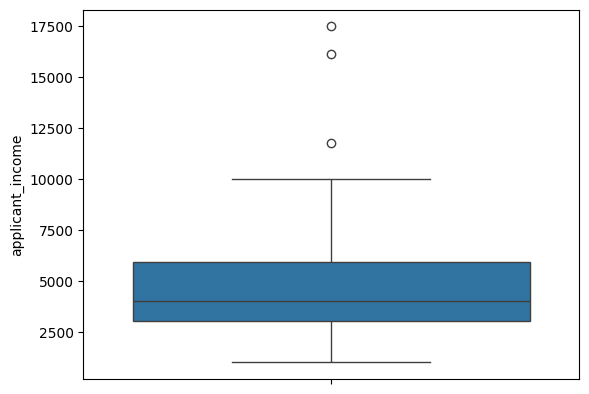

In [20]:
import seaborn as sns
sns.boxplot(df['applicant_income'])

karena outliers tidak terlalu banyak, maka akan dibiarkan saja

## Feature Encoding

pada data ini terdapat 10 variabel yang bertipe object, yaitu:
- load_id
- birth_date
- gender
- married
- dependents
- education
- self_employed
- has_credit_card
- property_type
- loan_status

In [24]:
df["gender"].unique()

array(['Male', 'Female'], dtype=object)

In [25]:
df["married"].unique()

array(['Yes', 'No'], dtype=object)

In [26]:
df["education"].unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [27]:
df["self_employed"].unique()

array(['No', 'Yes'], dtype=object)

In [28]:
df["has_credit_card"].unique()

array(['no', 'yes'], dtype=object)

In [29]:
df["property_type"].unique()

array(['house', 'apartment', 'studio'], dtype=object)

In [30]:
df["loan_status"].unique()

array(['APPROVE', 'REJECT'], dtype=object)

In [39]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['gender_temp'] = le.fit_transform(df['gender'])
df['married_temp'] = le.fit_transform(df['married'])
df['education_temp'] = le.fit_transform(df['education'])
df['self_employed_temp'] = le.fit_transform(df['self_employed'])
df['has_credit_card_temp'] = le.fit_transform(df['has_credit_card'])
df['property_type_temp'] = le.fit_transform(df['property_type'])
df['loan_status_temp'] = le.fit_transform(df['loan_status'])

# Business Insight

## Analisis minat pelanggan berdasarkan pada tipe properti
Langkah-langkah:

a. Buatlah tabel yang menunjukkan perbandingan jumlah pengajuan pinjaman oleh nasabah perempuan dan laki-laki untuk masing-masing tipe properti.

b. Buatlah visualisasi untuk data pada tahap sebelumnya. (Boleh menggunakan tools lain, misalnya ms. excel)

c. Tulislah interpretasi-mu

In [31]:
loan_counts = df.groupby(['gender', 'property_type']).size().unstack(fill_value=0)
print("Perbandingan jumlah pengajuan pinjaman berdasarkan gender dan tipe properti:")
print(loan_counts)

Perbandingan jumlah pengajuan pinjaman berdasarkan gender dan tipe properti:
property_type  apartment  house  studio
gender                                 
Female                 5      3       2
Male                  15     18       9


In [8]:
import matplotlib.pyplot as plt

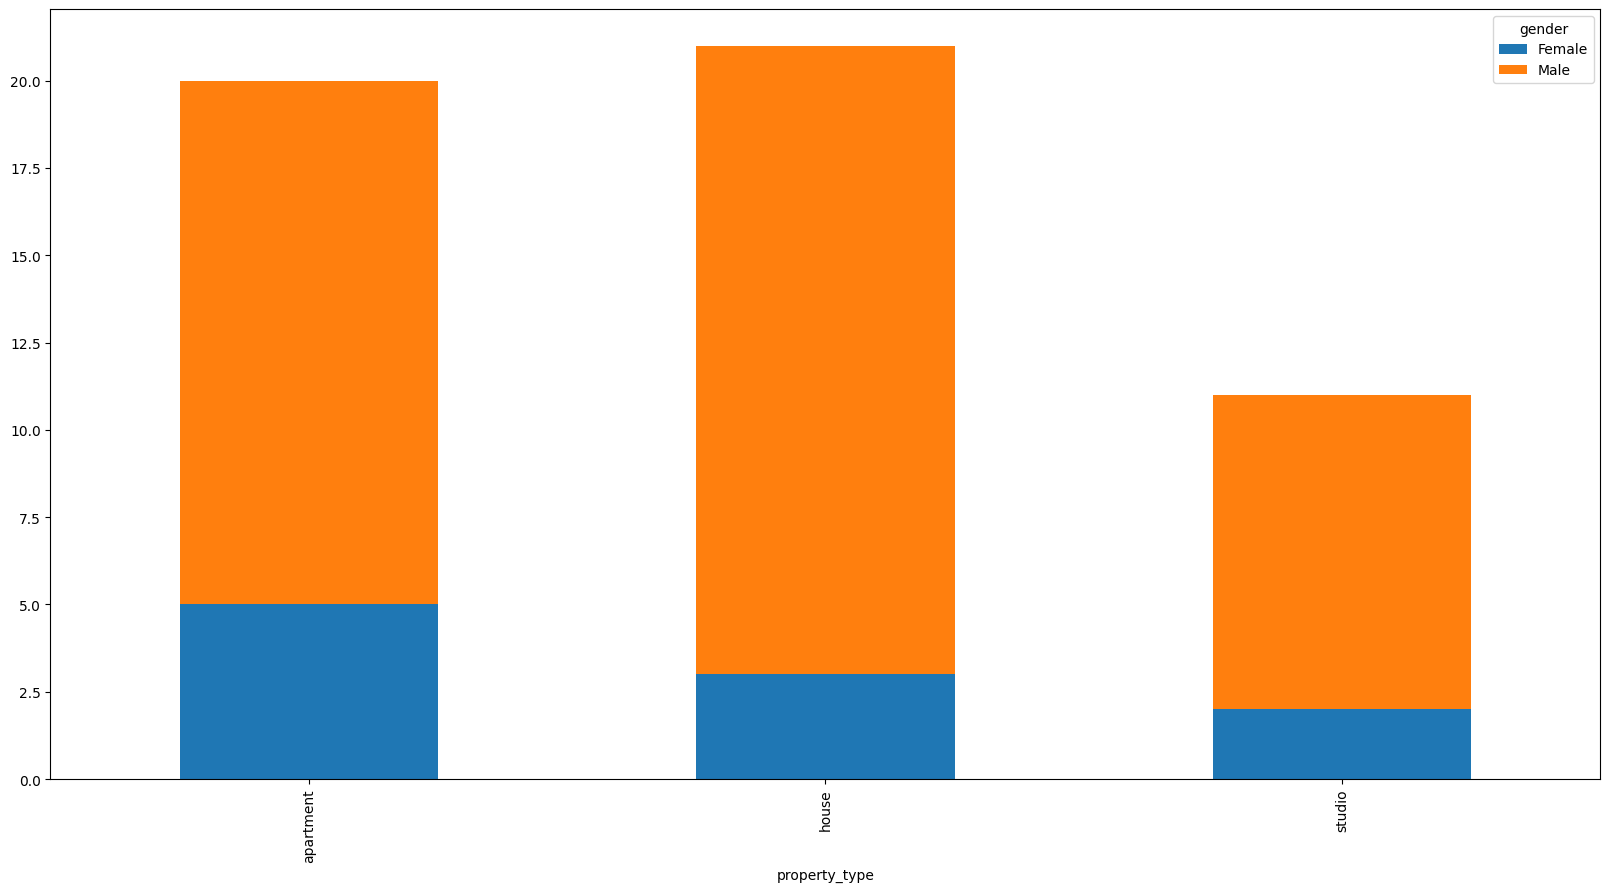

In [33]:
C = pd.crosstab(index=df["property_type"], columns=df["gender"])
q = C.plot(kind="bar", figsize=(20,10), stacked=True)

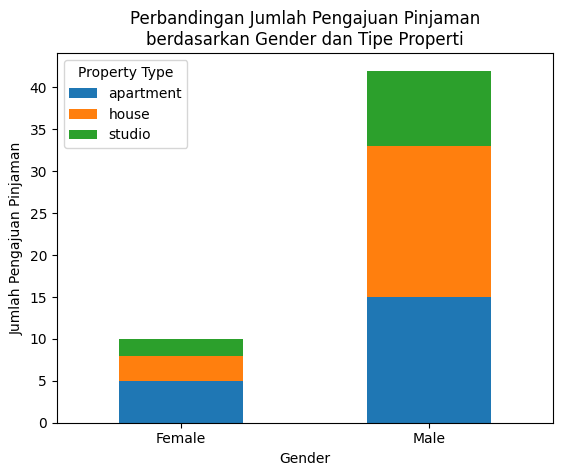

In [34]:
loan_counts.plot(kind='bar', stacked=True)
plt.title('Perbandingan Jumlah Pengajuan Pinjaman\nberdasarkan Gender dan Tipe Properti')
plt.xlabel('Gender')
plt.ylabel('Jumlah Pengajuan Pinjaman')
plt.xticks(rotation=0)
plt.legend(title='Property Type')
plt.show()

Dari tabel perbandingan jumlah pengajuan pinjaman berdasarkan jenis properti (apartment, house, dan studio) dan gender (male dan female), dapat dilihat beberapa hal:

1. **Perbandingan Berdasarkan Gender**:
   - Jumlah pengajuan pinjaman oleh nasabah laki-laki (Male) jauh lebih tinggi daripada nasabah perempuan (Female) untuk semua jenis properti. Hal ini menunjukkan bahwa nasabah laki-laki cenderung lebih aktif dalam mengajukan pinjaman dibandingkan nasabah perempuan.

2. **Perbandingan Berdasarkan Jenis Properti**:
   - Jumlah pengajuan pinjaman untuk rumah (house) memiliki jumlah tertinggi di antara semua jenis properti, baik oleh nasabah laki-laki maupun perempuan. Ini menunjukkan bahwa rumah menjadi pilihan utama dalam pengajuan pinjaman.
   - Pengajuan pinjaman untuk apartemen (apartment) berada di posisi kedua dalam jumlah pengajuan, sedangkan studio memiliki jumlah pengajuan yang paling rendah. Ini bisa menunjukkan preferensi nasabah terhadap tipe properti yang lebih besar dan mungkin lebih berkeluarga.

3. **Perbandingan Kombinasi Gender dan Tipe Properti**:
   - Dalam masing-masing jenis properti, jumlah pengajuan pinjaman oleh nasabah laki-laki (Male) jauh lebih tinggi daripada nasabah perempuan (Female).
   - Untuk apartemen (apartment), perbandingan jumlah pengajuan antara nasabah laki-laki dan perempuan cukup jauh, sedangkan untuk rumah (house) perbedaannya tidak terlalu signifikan. Ini bisa menunjukkan preferensi yang lebih beragam dalam memilih apartemen.
   - Studio memiliki jumlah pengajuan yang lebih rendah secara keseluruhan, namun perbandingan antara nasabah laki-laki dan perempuan relatif seimbang.

Kesimpulannya, meskipun terdapat variasi dalam jumlah pengajuan pinjaman berdasarkan jenis properti, terdapat ketidakseimbangan dalam pengajuan antara nasabah laki-laki dan perempuan, dengan nasabah laki-laki cenderung lebih aktif dalam mengajukan pinjaman.

## Analisis pengaruh status perkawinan terhadap jangka waktu meminjam
Langkah-langkah:

a. Buatlah tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun).

b. Buatlah visualisasi untuk data pada tahap sebelumnya. (Boleh menggunakan tools lain, misalnya ms. excel)

c. Tulislah interpretasi-mu

In [41]:
customer_counts = df.groupby(['married', 'loan_term_year']).size().unstack(fill_value=0)
print("Banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun):")
print(customer_counts)

Banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun):
loan_term_year  7   15  25  30  40
married                           
No               0   0   1  18   1
Yes              1   4   0  27   0


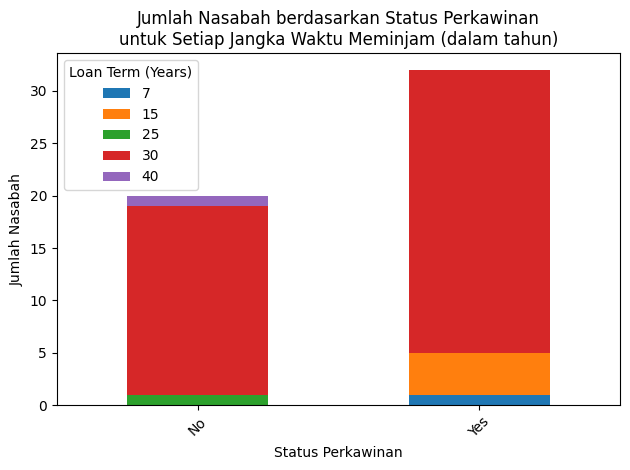

In [42]:
customer_counts.plot(kind='bar', stacked=True)
plt.title('Jumlah Nasabah berdasarkan Status Perkawinan\nuntuk Setiap Jangka Waktu Meminjam (dalam tahun)')
plt.xlabel('Status Perkawinan')
plt.ylabel('Jumlah Nasabah')
plt.xticks(rotation=45)
plt.legend(title='Loan Term (Years)')
plt.tight_layout()
plt.show()

Dari tabel yang menunjukkan banyaknya nasabah yang sudah dikelompokkan berdasarkan status perkawinan untuk setiap jangka waktu meminjam (dalam tahun), kita bisa mendapatkan beberapa kesimpulan:

1. **Pengaruh Status Perkawinan terhadap Jumlah Nasabah dalam Berbagai Jangka Waktu Pinjaman**:
   - Nasabah yang status perkawinannya 'Yes' (Married) memiliki jumlah yang lebih signifikan dalam jangka waktu pinjaman 7, 15, dan 30 tahun. Ini menunjukkan bahwa nasabah yang sudah menikah lebih cenderung mengambil pinjaman dengan jangka waktu yang lebih lama.
   - Di sisi lain, untuk jangka waktu pinjaman 25 dan 40 tahun, nasabah yang status perkawinannya 'No' (Not Married) memiliki jumlah yang lebih signifikan. Hal ini menunjukkan adanya variasi dalam pola pinjaman antara nasabah yang sudah menikah dan yang belum menikah, tergantung pada jangka waktu pinjaman yang dipilih.

2. **Pola Peminjaman Berdasarkan Jangka Waktu**:
   - Jangka waktu pinjaman yang paling umum adalah 30 tahun, dengan jumlah nasabah yang cukup tinggi pada kategori tersebut.
   - Jumlah nasabah yang memilih jangka waktu pinjaman 25 tahun juga cukup signifikan, terutama di antara nasabah yang belum menikah.
   - Jangka waktu pinjaman 40 tahun memiliki jumlah nasabah yang lebih rendah dibandingkan dengan jangka waktu lainnya, terutama di antara nasabah yang sudah menikah.

Kesimpulannya, status perkawinan dapat memengaruhi pilihan jangka waktu pinjaman, dengan nasabah yang sudah menikah cenderung memilih jangka waktu yang lebih lama, sementara nasabah yang belum menikah lebih bervariasi dalam pilihannya, termasuk memilih jangka waktu yang lebih pendek.